## Assignment. Exercise 2

### Data preparation

In [ ]:
import pandas as pd
import datetime as dt

In [ ]:
! ls '/content/drive/My Drive/Colab/'

ls: cannot access '/content/drive/My Drive/Colab/': No such file or directory


In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Colab/BA - Assigment 2.xlsx') 


FileNotFoundError: ignored

In [ ]:
df1 = pd.read_excel('BA - Assigment 2.xlsx', sheet_name='Redemptions') 
df1

FileNotFoundError: ignored

In [ ]:
df2 = pd.read_excel('BA - Assigment 2.xlsx', sheet_name='Incentives') 
df2

,Incentive reference,Incentive name
0,4738889,Barnyard Animals Jumbo Knob
1,4738890,House Pets Jumbo Knob
2,4739026,Folding Medieval Castle
3,4739267,Dinosaurs Floor Puzzle
4,4739276,U.S.A. Map Floor
...,...,...
7666,ZW_4253-LLT,Kit para ojos con estuche plateado
7667,ZW_4270-R,Kit aguacate Tweezerman
7668,ZW_75000-576,Wok antiadherente Zwilling
7669,zzAR.ARG.16939,Balanza electrónica bamboo


In [ ]:
df1['Incentive reference'] = df1['Incentive reference'].astype(str).str.strip()
df1.head()

,Region,Redemption date,Redemption sequence,Redemption status,Incentive reference,Shop,Class,Units
0,US,2020-01-01,8504398,Not cancelled,7045027,US,Gift,1
1,US,2020-01-01,8504876,Not cancelled,16026364,US,Gift,1
2,US,2020-01-01,8504047,Not cancelled,26143415,US,Gift,1
3,US,2020-01-01,8504493,Not cancelled,26150188,US,Gift,1
4,US,2020-01-01,8504049,Not cancelled,26974600,US,Gift,1


## Question 1: Add a column with the incentive name to the sheet Redemptions.

In [ ]:
df1= pd.merge(df1, df2, on="Incentive reference", how="left")
df1

,Region,Redemption date,Redemption sequence,Redemption status,Incentive reference,Shop,Class,Units,Incentive name
0,US,2020-01-01,8504398,Not cancelled,7045027,US,Gift,1,Conair 2-In-1 Chopper and Trimmer
1,US,2020-01-01,8504876,Not cancelled,16026364,US,Gift,1,Victoria Ballerina Doll
2,US,2020-01-01,8504047,Not cancelled,26143415,US,Gift,1,Himalayan Crystal Salt
3,US,2020-01-01,8504493,Not cancelled,26150188,US,Gift,1,St Dalfour Organic Tea Strawberry
4,US,2020-01-01,8504049,Not cancelled,26974600,US,Gift,1,Himalayan Salt Sole Salt Chunks in Jar
...,...,...,...,...,...,...,...,...,...
183262,Latam,2020-02-29,8688569,Not cancelled,CO.QTM.ENRADASENCILLA2D,CO,Gift,1,Tarjeta Boleta de cine
183263,Latam,2020-02-29,8688592,Not cancelled,CO.QTM.ENRADASENCILLA2D,CO,Gift,1,Tarjeta Boleta de cine
183264,Latam,2020-02-29,8688600,Not cancelled,CO.QTM.ENRADASENCILLA2D,CO,Gift,1,Tarjeta Boleta de cine
183265,Latam,2020-02-29,8688615,Not cancelled,CO.QTM.ENRADASENCILLA2D,CO,Gift,1,Tarjeta Boleta de cine


## Question 2: Build a pivot table with the total units of redemption per month per shop.

In [ ]:
df1['month'] = df1['Redemption date'].dt.month

In [ ]:
pivot1 = df1.pivot_table(index=['Shop'], columns=['month'], values=('Units'), aggfunc=('sum'))
pivot1 

month,1,2
Shop,,
AR,9423.00,6779.00
BO,1.00,1.00
BR,26730.00,21531.00
CL,11007.00,10348.00
CO,12505.00,11352.00
CR,4.00,5.00
DE,1367.00,1175.00
DO,39.00,3.00
EC,202.00,204.00


## Question 3: Build a graph with the information of the last question.

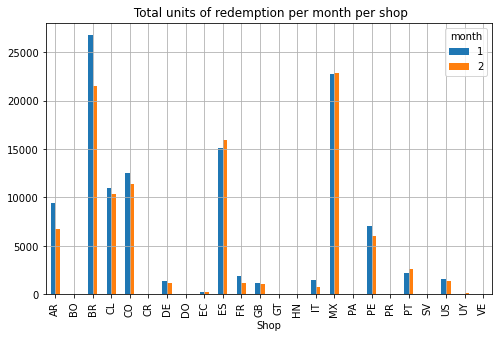

In [ ]:
pivot1.plot.bar(figsize=(8,5), grid=True, title=" Total units of redemption per month per shop");

## Question 4: Build another graph with the % of units by Class for each shop

In [ ]:
pivot2 = df1.pivot_table(index=['Shop'], columns=['Class'], values=('Units'), aggfunc=('sum')).fillna(0)
pivot2['Total']=pivot2['Donation']+pivot2['Draws']+pivot2['Gift']
pivot2['Donation%'] = pivot2['Donation']/pivot2['Total']*100
pivot2['Draws%'] = pivot2['Draws']/pivot2['Total']*100
pivot2['Gift%'] = pivot2['Gift']/pivot2['Total']*100
pivot2=pivot2.drop(columns=['Donation', 'Draws', 'Gift', 'Total'])
pivot2.head()

Class,Donation%,Draws%,Gift%
Shop,,,
AR,5.38,63.56,31.06
BO,0.00,100.00,0.00
BR,5.07,66.88,28.05
CL,7.23,44.00,48.77
CO,4.07,56.70,39.23


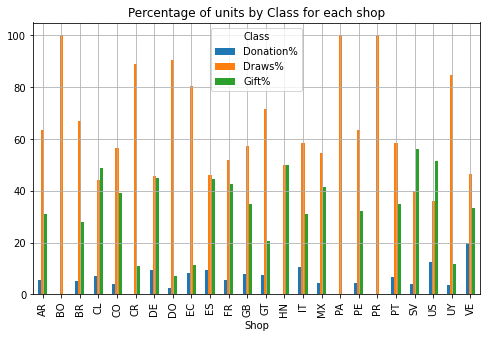

In [ ]:
pivot2.plot.bar(figsize=(8,5), grid=True, title="Percentage of units by Class for each shop");

## Question 5: If you must eliminate duplicates on a data table, how would you do it?

First I would make a copy of the original data, then I gonna check how much duplicates we have in a data set. And afterwards I would drop the duplicates. In our dataset for instance there are no duplicates.

In [ ]:
df1_copy=df1

In [ ]:
# we can check how many duplicates we have before taking any action
df1.duplicated().sum()

0

In [ ]:
# dropping duplicates 
df1 = df1.drop_duplicates()